# Random Forest

In [1]:
%pwd
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
import csv
from scipy import stats
from scipy.optimize import curve_fit

#Random Number
r = 42
labels = ['CN', 'EMCI', 'LMCI', 'AD']

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Helvetica"
matplotlib.rcParams['font.family'] = "sans-serif"


C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def heatmap(mat, lbl=None):
    #Heatmap
    plt.figure(figsize = (12,10))
    ax = sns.heatmap(mat, cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.yticks(rotation=0) 
    plt.title('Random Forest Classification Results', fontsize=18)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    ax.hlines([3], *ax.get_xlim())
    ax.vlines([3], *ax.get_xlim())
    ax.axhline(y=0, color='k',linewidth=4)
    ax.axhline(y=mat.shape[1], color='k',linewidth=4)
    ax.axvline(x=0, color='k',linewidth=4)
    ax.axvline(x=mat.shape[0], color='k',linewidth=4)
    ax.tick_params(axis='both', which='both', length=0)
    if lbl:
        plt.text(0.375, 0.21, 'False Negative:\n'+str(lbl[0])+' Individuals', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=9)
        plt.text(0.375, 0.95, 'True Negative:\n'+str(lbl[1])+' Normal Individuals', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=9)
        plt.text(0.875, 0.21, 'True Positive:\n'+str(lbl[2])+" Alzheimer's Individuals", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=9, color = 'white')
        plt.text(0.875, 0.95, 'False Positive:\n'+str(lbl[3])+' Individuals', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=9)
    else:
        plt.text(0.375, 0.21, 'False Negative', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=9)
        plt.text(0.375, 0.95, 'True Negative', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=9)
        plt.text(0.875, 0.21, 'True Positive', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=9, color = 'white')
        plt.text(0.875, 0.95, 'False Positive', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=9)

## Load Data

In [3]:
#Loading in data
X = pd.read_csv('Output/expression_matrix.txt', index_col=0).T
y = pd.read_csv('Output/metadata.txt', index_col=0, header=None, squeeze = True)

## SMOTE Oversampling

In [4]:
#Variables and Acutal
feature_list = list(X.columns)
print(y.value_counts())

#Oversampling
X, y = SMOTE(random_state=r, n_jobs=-1).fit_resample(X, y)
print(y.value_counts())

CN      260
LMCI    226
EMCI    215
AD       43
Name: 1, dtype: int64
CN      260
LMCI    260
AD      260
EMCI    260
Name: 1, dtype: int64


## Train/Test Split

In [5]:
y = pd.Series(y)

#Count
print(y.value_counts())

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=r)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

CN      260
LMCI    260
AD      260
EMCI    260
Name: 1, dtype: int64
Training Features Shape: (832, 48157)
Training Labels Shape: (832,)
Testing Features Shape: (208, 48157)
Testing Labels Shape: (208,)
CN      211
LMCI    209
AD      208
EMCI    204
Name: 1, dtype: int64
EMCI    56
AD      52
LMCI    51
CN      49
Name: 1, dtype: int64


In [6]:
#Binary Labels
y_Mut = y
for label in labels:
    if label!='AD':
        y_Mut = y_Mut.replace(label, 'CONTROL')
print(y_Mut.head())
print(y_Mut.size)

0    CONTROL
1    CONTROL
2         AD
3    CONTROL
4    CONTROL
Name: 1, dtype: object
1040


## Outer Random Forest

In [7]:
#Outer Random Forest
rf = RandomForestClassifier(n_estimators = 1000, random_state=r, oob_score=True, verbose=1, n_jobs = -1)
rf.fit(X_train, y_train) #Train
y_pred = rf.predict(X_test) #Predict

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   14.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Results: 
              precision    recall  f1-score   support

          AD       1.00      0.98      0.99        52
          CN       0.35      0.49      0.41        49
        EMCI       0.58      0.50      0.54        56
        LMCI       0.65      0.51      0.57        51

    accuracy                           0.62       208
   macro avg       0.65      0.62      0.63       208
weighted avg       0.65      0.62      0.63       208

Test:  0.6201923076923077
OOB Score:  0.5973557692307693


C:\Users\andre\AppData\Roaming\Python\Python37\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


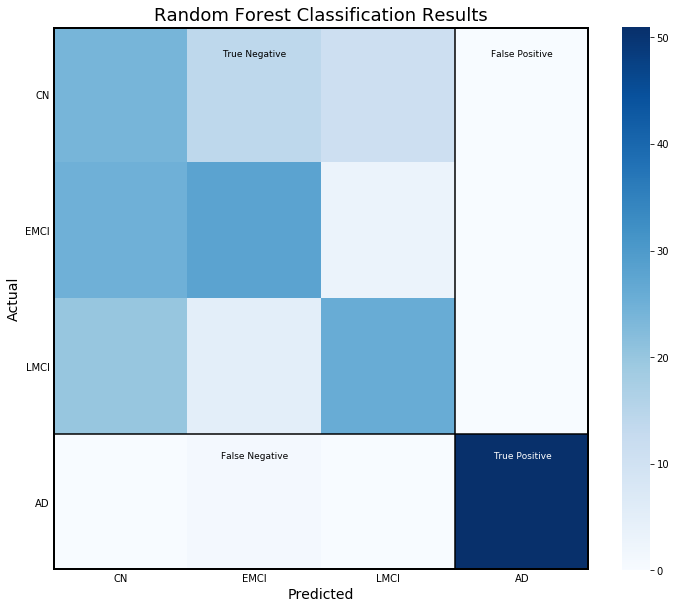

In [8]:
#Results
print("Results: ")
mat = confusion_matrix(y_test, y_pred, labels=labels)
print(classification_report(y_test,y_pred)) #Accuarcy
print('Test: ', accuracy_score(y_test, y_pred))
print('OOB Score: ', rf.oob_score_)
#Heatmap
heatmap(mat)

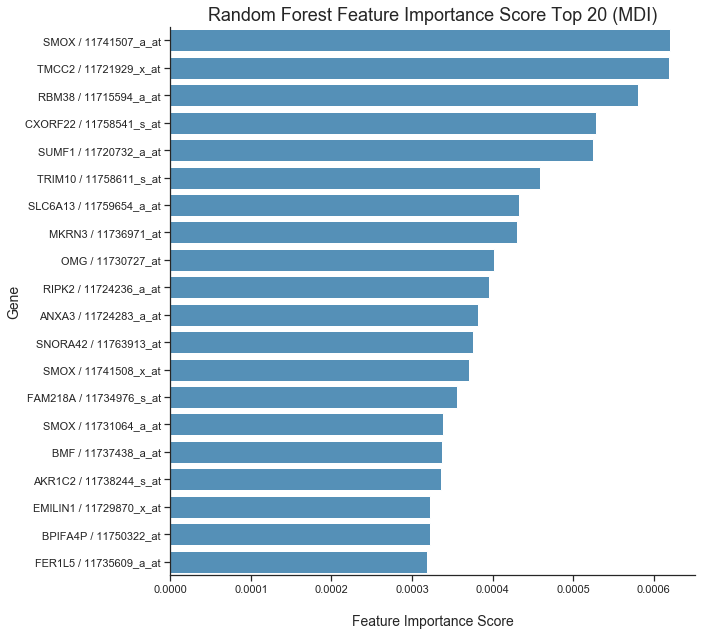

In [9]:
#Feature Importance
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)

#Barplot
plt.figure(figsize = (10,9))
sns.set(font_scale=1)
sns.set_style("ticks")
sns.barplot(x=feature_imp[:20], y=feature_imp.index[:20], color = '#4594c7')
sns.despine()
plt.title('Random Forest Feature Importance Score Top 20 (MDI)', fontsize=18)
plt.xlabel('Feature Importance Score', fontsize=14,labelpad=20)
plt.ylabel('Gene', fontsize=14)
plt.tight_layout()
plt.savefig('Graphs/outer_bar.pdf', format='pdf', transparent=True)

SMOX / 11741507_a_at       0.000621
TMCC2 / 11721929_x_at      0.001239
RBM38 / 11715594_a_at      0.001820
CXORF22 / 11758541_s_at    0.002349
SUMF1 / 11720732_a_at      0.002873
                             ...   
RAC3 / 11729313_at         1.000000
OR9K2 / 11742330_at        1.000000
CALD1 / 11722531_a_at      1.000000
CHRDL2 / 11757002_a_at     1.000000
FAM221B / 11750249_a_at    1.000000
Length: 48157, dtype: float64


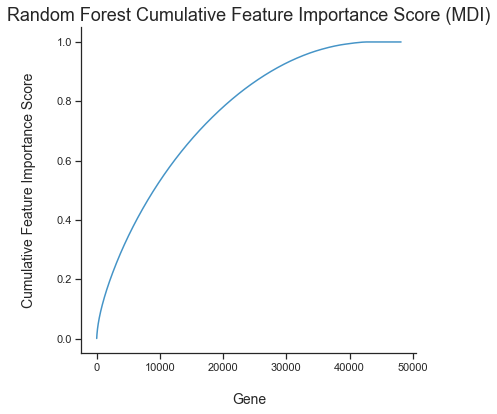

In [10]:
feature_imp_cum = feature_imp.cumsum()
print(feature_imp_cum)
plt.figure(figsize = (6,6))
sns.set(font_scale=1)
sns.set_style("ticks")
plt.plot(range(1, feature_imp_cum.size+1), feature_imp_cum, color = '#4594c7')
sns.despine()
plt.title('Random Forest Cumulative Feature Importance Score (MDI)', fontsize=18)
plt.xlabel('Gene', fontsize=14,labelpad=20)
plt.ylabel('Cumulative Feature Importance Score', fontsize=14,labelpad=20)
plt.savefig('Graphs/outer_cumulative_feature_importance.pdf', format='pdf', transparent=True)
plt.show()

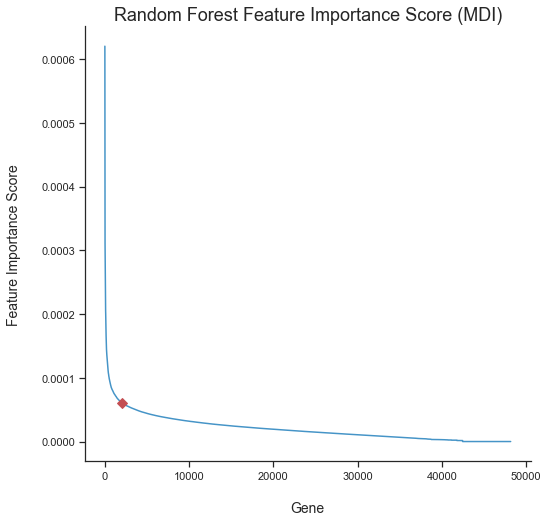

In [11]:
plt.figure(figsize = (8,8))
sns.set(font_scale=1)
sns.set_style("ticks")
plt.plot(range(1, feature_imp.size+1), feature_imp, '-D', markevery=[2000], color = '#4594c7', markerfacecolor="r", markeredgecolor="r", markersize=7)
sns.despine()
plt.title('Random Forest Feature Importance Score (MDI)', fontsize=18)
plt.xlabel('Gene', fontsize=14,labelpad=20)
plt.ylabel('Feature Importance Score', fontsize=14,labelpad=20)
plt.savefig('Graphs/outer_feature_importance.pdf', format='pdf', transparent=True)
plt.show()

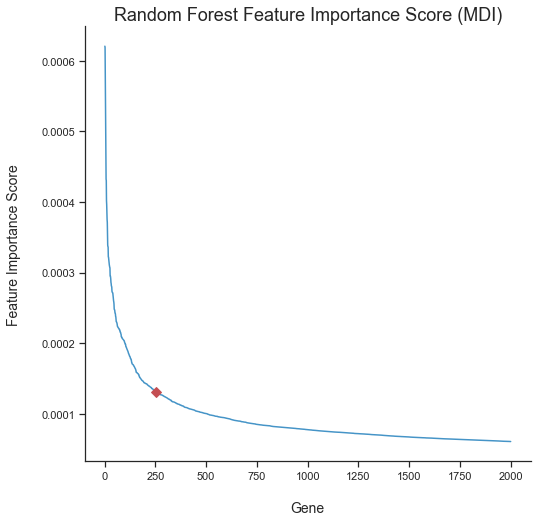

In [12]:
plt.figure(figsize = (8,8))
sns.set(font_scale=1)
sns.set_style("ticks")
plt.plot(range(1, feature_imp[:2000].size+1), feature_imp[:2000], '-D', markevery=[250], color = '#4594c7', markerfacecolor="r", markeredgecolor="r", markersize=7)
sns.despine()
plt.title('Random Forest Feature Importance Score (MDI)', fontsize=18)
plt.xlabel('Gene', fontsize=14,labelpad=20)
plt.ylabel('Feature Importance Score', fontsize=14,labelpad=20)
plt.savefig('Graphs/outer_feature_importance_2000.pdf', format='pdf', transparent=True)
plt.show()

## Save Top 2000 Features

In [13]:
#Save genes
feature_imp[:2000].to_csv('Output/2000_feature_importance_scores.txt', quoting=csv.QUOTE_MINIMAL)
feature_imp[:2000].index.to_series().to_csv('Output/2000_ranked_genes.txt', quoting=csv.QUOTE_MINIMAL, index=False)

## Wilcox

In [14]:
# Wilcox Score
pvalues = pd.Series(index=feature_imp[:2000].index)
statistics = pd.Series(index=feature_imp[:2000].index)

c = X.T[y[y == "AD"].index]
e = X.T[y[y != "AD"].index]
c_ = X.T[y[y == "AD"].index].T
e_ = X.T[y[y != "AD"].index].T

for gene in feature_imp[:2000].index:
    statistics[gene], pvalues[gene] = stats.ranksums(c_[[gene]], e_[[gene]])

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Barplot
genes = feature_imp[:20].index

logp = pvalues.apply(np.log10)
logp = logp*-1

plt.figure(figsize = (10,9))
sns.set(font_scale=1)
sns.set_style("ticks")
sns.barplot(x=logp.loc[genes], y=genes, color = '#4594c7')
sns.despine()
plt.title('Wilcox p-values', fontsize=18)
plt.xlabel('-log10 p-value', fontsize=14,labelpad=20)
plt.ylabel('Gene', fontsize=14)
plt.tight_layout()


In [ ]:
genes = feature_imp[:2000].index

logp = pvalues.apply(np.log10)
logp = logp*-1

plt.figure(figsize = (8,8))
sns.set(font_scale=1)
sns.set_style("ticks")
plt.plot(range(1, genes.size+1), logp.loc[genes], color = '#4594c7')
sns.despine()
plt.title('Wilcox p-values', fontsize=18)
plt.xlabel('Gene', fontsize=14,labelpad=20)
plt.ylabel('-log10 p-value', fontsize=14,labelpad=20)
plt.savefig('Graphs/Clustering/WilcoxScore.pdf', format='pdf', transparent=True)
plt.show()

In [ ]:
genes = feature_imp[:2000].index

logp = pvalues.apply(np.log10)
logp = logp*-1

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x_ = range(1, genes.size+1)
y_ = logp.loc[genes]

# Fit an exponential
popt, pcov = curve_fit(func, x_, y_)
yEXP = func(x_, *popt)

plt.figure(figsize = (8,8))
sns.set(font_scale=1)
sns.set_style("ticks")
plt.plot(x_, yEXP, color = '#4594c7')
plt.plot(x_, y_, color = '#4594c7', alpha=0.4)
sns.despine()
plt.title('Wilcox p-values', fontsize=18)
plt.xlabel('Gene', fontsize=14,labelpad=20)
plt.ylabel('-log10 p-value', fontsize=14,labelpad=20)
plt.savefig('Graphs/WilcoxScore2.pdf', format='pdf', transparent=True)
plt.show()

## Subset

In [99]:
#Top 250 Genes
n_genes=250
X_train_i = X_train.loc[:, feature_imp.index[:n_genes]]
X_test_i = X_test.loc[:, feature_imp.index[:n_genes]]
X_i = X.loc[:, feature_imp.index[:n_genes]]
indexes = feature_imp.index[:n_genes]

## Inner Random Forest

In [100]:
#Inner Random Forest
rf_most_important = RandomForestClassifier(n_estimators = 1000, random_state=r, oob_score=True, verbose=1, n_jobs = -1)

rf_most_important.fit(X_train_i, y_train)
y_pred_train = rf_most_important.predict(X_train_i)
y_pred = rf_most_important.predict(X_test_i)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Results: 
              precision    recall  f1-score   support

          AD       1.00      0.96      0.98        52
          CN       0.28      0.37      0.32        49
        EMCI       0.56      0.41      0.47        56
        LMCI       0.44      0.45      0.45        51

    accuracy                           0.55       208
   macro avg       0.57      0.55      0.55       208
weighted avg       0.57      0.55      0.56       208

Train:  1.0
Test:  0.5480769230769231
OOB Score:  0.5985576923076923


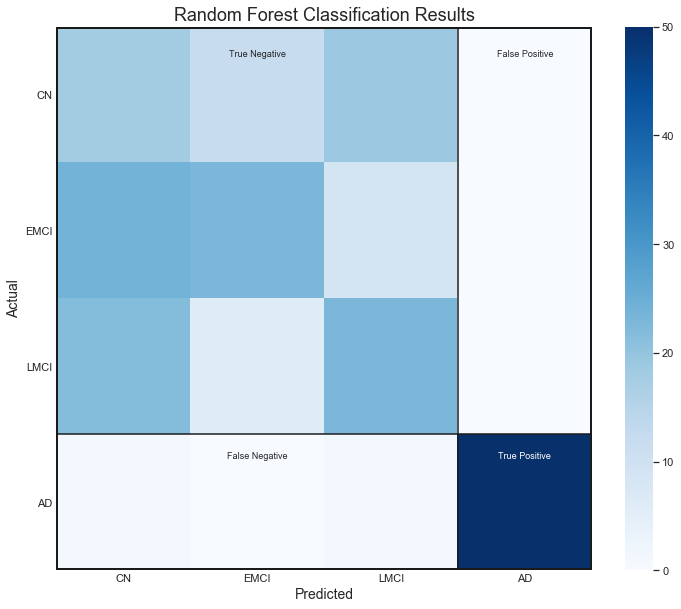

In [101]:
#Results
print("Results: ")
mat = confusion_matrix(y_test, y_pred, labels=labels)
print(classification_report(y_test,y_pred))
print('Train: ', accuracy_score(y_train, y_pred_train))
print('Test: ', accuracy_score(y_test, y_pred))
print('OOB Score: ', rf_most_important.oob_score_)

#Heatmap
heatmap(mat)

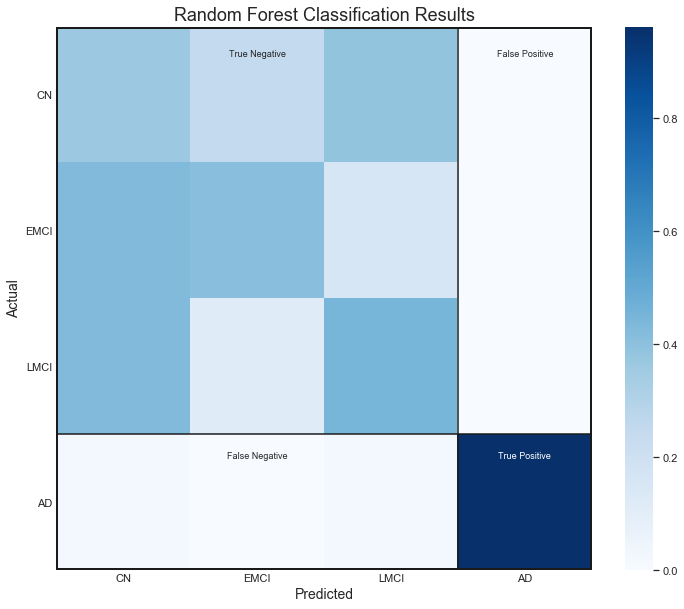

In [102]:
mat = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
#Heatmap
heatmap(mat)

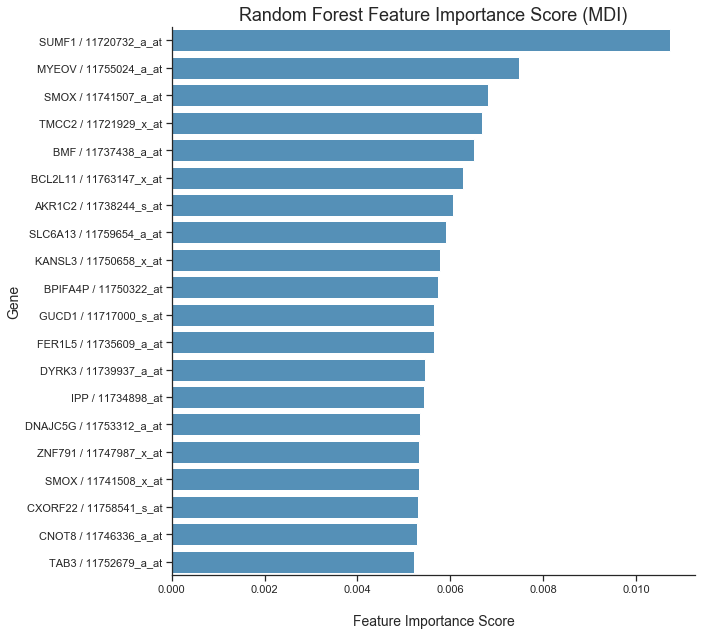

In [103]:
#Feature Importance
feature_imp = pd.Series(rf_most_important.feature_importances_,index=X_i.columns).sort_values(ascending=False)

#Barplot
plt.figure(figsize = (10,9))
sns.set(font_scale=1)
sns.set_style("ticks")
sns.barplot(x=feature_imp[:20], y=feature_imp.index[:20], color = '#4594c7')
sns.despine()
plt.title('Random Forest Feature Importance Score (MDI)', fontsize=18)
plt.xlabel('Feature Importance Score', fontsize=14,labelpad=20)
plt.ylabel('Gene', fontsize=14)
plt.tight_layout()
plt.savefig('Graphs/inner_bar.pdf', format='pdf', transparent=True)

SUMF1 / 11720732_a_at       0.010735
MYEOV / 11755024_a_at       0.018204
SMOX / 11741507_a_at        0.025004
TMCC2 / 11721929_x_at       0.031692
BMF / 11737438_a_at         0.038197
                              ...   
CARM1 / 11754363_s_at       0.990222
LGALS3 / 11725937_a_at      0.992803
UBE2H / 11728670_a_at       0.995268
SLC25A39 / 11715517_s_at    0.997641
TRAK2 / 11716786_s_at       1.000000
Length: 250, dtype: float64


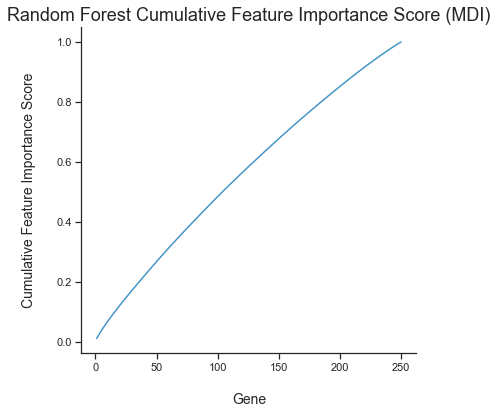

In [104]:
feature_imp_cum = feature_imp.cumsum()
print(feature_imp_cum)
plt.figure(figsize = (6,6))
sns.set(font_scale=1)
sns.set_style("ticks")
plt.plot(range(1, feature_imp_cum.size+1), feature_imp_cum, color = '#4594c7')
sns.despine()
plt.title('Random Forest Cumulative Feature Importance Score (MDI)', fontsize=18)
plt.xlabel('Gene', fontsize=14,labelpad=20)
plt.ylabel('Cumulative Feature Importance Score', fontsize=14,labelpad=20)
plt.savefig('Graphs/inner_cumulative_feature_importance.pdf', format='pdf', transparent=True)
plt.show()

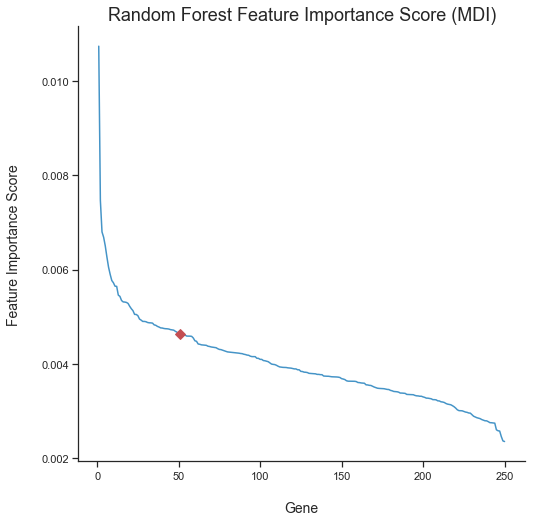

In [105]:
plt.figure(figsize = (8,8))
sns.set(font_scale=1)
sns.set_style("ticks")
plt.plot(range(1, feature_imp.size+1), feature_imp, "-D", markevery=[50], color = '#4594c7', markerfacecolor="r", markeredgecolor="r", markersize=7)
sns.despine()
plt.title('Random Forest Feature Importance Score (MDI)', fontsize=18)
plt.xlabel('Gene', fontsize=14,labelpad=20)
plt.ylabel('Feature Importance Score', fontsize=14,labelpad=20)
plt.savefig('Graphs/inner_feature_importance.pdf', format='pdf', transparent=True)
plt.show()

## Save Top 250 Features

In [106]:
#Save genes
feature_imp.to_csv('Output/250_feature_importance_scores.txt', quoting=csv.QUOTE_MINIMAL)
feature_imp.index.to_series().to_csv('Output/250_ranked_genes.txt', quoting=csv.QUOTE_MINIMAL, index=False)

## Save Top 100 Features

In [107]:
#Save genes
feature_imp[:100].to_csv('Output/100_feature_importance_scores.txt', quoting=csv.QUOTE_MINIMAL)
feature_imp[:100].index.to_series().to_csv('Output/100_ranked_genes.txt', quoting=csv.QUOTE_MINIMAL, index=False)

## 5 Fold Cross Validation

In [108]:
#5 Fold Cross Validation
y_pred = cross_val_predict(rf_most_important, X_i, y, cv=5, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]:

In [109]:
#5 Fold Cross Validation Probabilities
y_pred_prob = cross_val_predict(rf_most_important, X_i, y, cv=5, verbose=3, method='predict_proba')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 484 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]:

Results: 
              precision    recall  f1-score   support

          AD   0.969925  0.992308  0.980989       260
     CONTROL   0.997416  0.989744  0.993565       780

    accuracy                       0.990385      1040
   macro avg   0.983670  0.991026  0.987277      1040
weighted avg   0.990543  0.990385  0.990421      1040

Accuracy:  0.9903846153846154


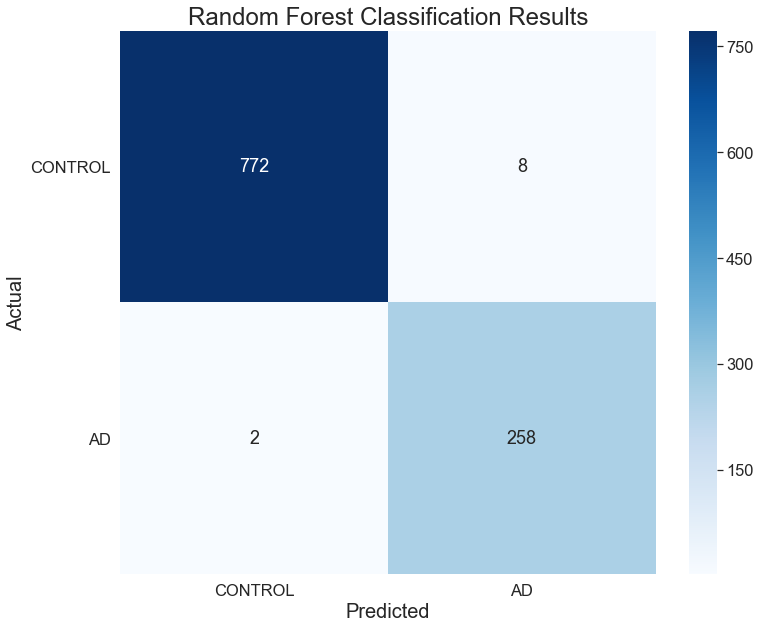

In [110]:
#Binary Labels
y_pred_Mut = y_pred
for label in labels:
    if label!='AD':
        y_pred_Mut = np.where(y_pred_Mut==label, 'CONTROL', y_pred_Mut)

#Results
print("Results: ")
mat = confusion_matrix(y_Mut, y_pred_Mut, labels=['CONTROL', 'AD'])
print(classification_report(y_Mut, y_pred_Mut, digits=6))
print('Accuracy: ', accuracy_score(y_Mut, y_pred_Mut))
l = [mat[1][0], mat[0][0], mat[1][1], mat[0][1]]

#Heatmap
sns.set(font_scale=1.5)
plt.figure(figsize = (12,10))
sns.heatmap(mat, annot=True, cmap="Blues", fmt='g', xticklabels=['CONTROL', 'AD'], yticklabels=['CONTROL', 'AD'], annot_kws={"fontsize":18})
plt.yticks(rotation=0) 
plt.title('Random Forest Classification Results', fontsize=24)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.savefig('Graphs/5F_confusion_matrix.pdf', format='pdf', transparent=True)
sns.set(font_scale=1)

In [112]:
# Save
y_pred_prob = pd.DataFrame(y_pred_prob, columns=rf_most_important.classes_)
y_pred_prob.to_csv('Output/Random Forest Probabilities.txt', quoting=csv.QUOTE_MINIMAL)

# Make Binary
y_pred_prob = pd.DataFrame({'AD':y_pred_prob['AD'], 'CONTROL':y_pred_prob['CN']+y_pred_prob['EMCI']+y_pred_prob['LMCI']})
y_pred_prob

,AD,CONTROL
0,0.143,0.857
1,0.196,0.804
2,0.826,0.174
3,0.037,0.963
4,0.130,0.870
...,...,...
1035,0.162,0.838
1036,0.072,0.928
1037,0.120,0.880
1038,0.022,0.978


0.9989694280078896


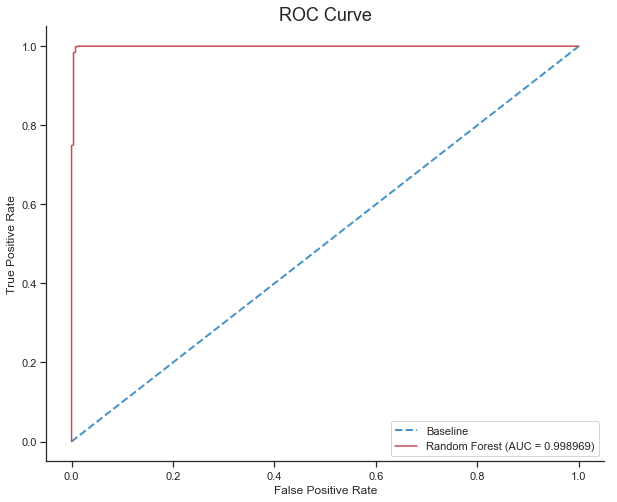

In [27]:
# ROC
probs = y_pred_prob['CONTROL'].to_list()

roc_value = roc_auc_score(y_Mut, probs)
print(roc_value)

# Calculate false positive rates and true positive rates
base_fpr, base_tpr, _ = roc_curve(y_Mut, [1 for _ in range(len(probs))], pos_label='CONTROL')
model_fpr, model_tpr, _ = roc_curve(y_Mut, probs, pos_label='CONTROL')

plt.figure(figsize = (10, 8))

# Plot both curves
sns.set(font_scale=1)
sns.set_style("ticks")
plt.plot(base_fpr, base_tpr, label = 'Baseline', linestyle='--', lw=2, color = '#4594c7')
plt.plot(model_fpr, model_tpr, 'r', label = r'Random Forest (AUC = %0.6f)' % (roc_value))
sns.despine()
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=18)
plt.savefig('Graphs/ROC_curve.pdf', format='pdf', transparent=True)
plt.show();


In [28]:
print(classification_report(y_Mut, y_pred_Mut, digits=6))

              precision    recall  f1-score   support

          AD   0.969925  0.992308  0.980989       260
     CONTROL   0.997416  0.989744  0.993565       780

    accuracy                       0.990385      1040
   macro avg   0.983670  0.991026  0.987277      1040
weighted avg   0.990543  0.990385  0.990421      1040



Results: 
              precision    recall  f1-score   support

          AD   0.969925  0.992308  0.980989       260
          CN   0.388489  0.415385  0.401487       260
        EMCI   0.518519  0.484615  0.500994       260
        LMCI   0.509881  0.496154  0.502924       260

    accuracy                       0.597115      1040
   macro avg   0.596703  0.597115  0.596598      1040
weighted avg   0.596703  0.597115  0.596598      1040

Accuracy:  0.5971153846153846


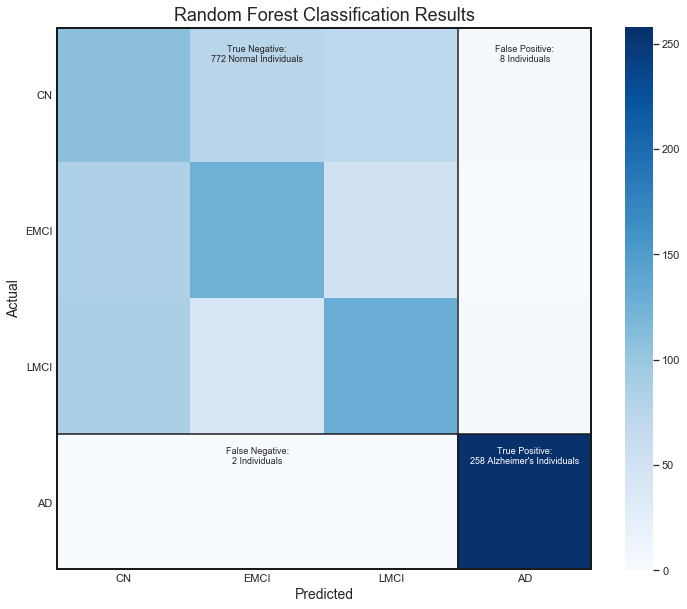

In [29]:
#Results
print("Results: ")
mat = confusion_matrix(y, y_pred, labels=labels)
print(classification_report(y, y_pred, digits=6))
print('Accuracy: ', accuracy_score(y, y_pred))
#Heatmap
heatmap(mat, lbl=l)

In [30]:
print(classification_report(y, y_pred, digits=6))

              precision    recall  f1-score   support

          AD   0.969925  0.992308  0.980989       260
          CN   0.388489  0.415385  0.401487       260
        EMCI   0.518519  0.484615  0.500994       260
        LMCI   0.509881  0.496154  0.502924       260

    accuracy                       0.597115      1040
   macro avg   0.596703  0.597115  0.596598      1040
weighted avg   0.596703  0.597115  0.596598      1040



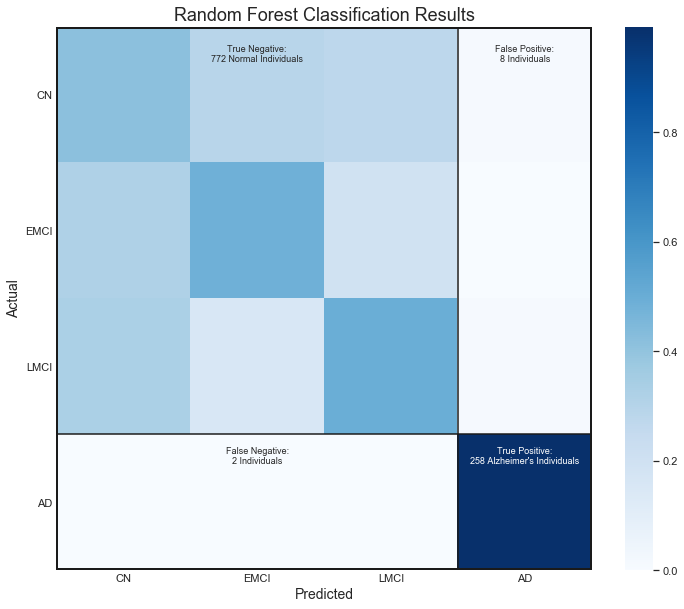

In [31]:
mat = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
#Heatmap
heatmap(mat, lbl=l)
plt.savefig('Graphs/5F_heatmap.pdf', format='pdf', transparent=True)

## Test number of genes impact on accuracy

In [32]:
genes = feature_imp.index.to_list()
numgenes = []
accuracy = []

while genes:
    X_train_a = X_train.loc[:, genes]
    X_test_a = X_test.loc[:, genes]
    X_a = X.loc[:, genes]
    indexes = X_a.index
    
    #Inner Random Forest
    rf_most_important = RandomForestClassifier(n_estimators = 1000, random_state=r, oob_score=True, verbose=0, n_jobs = -1)
    rf_most_important.fit(X_train_a, y_train)
    y_pred_train = rf_most_important.predict(X_train_a)
    y_pred = rf_most_important.predict(X_test_a)
    
    #Binary Labels
    y_Mut = y_test
    for label in labels:
        if label!='AD':
            y_Mut = y_Mut.replace(label, 'CONTROL')
        
    y_pred_Mut = y_pred
    for label in labels:
        if label!='AD':
            y_pred_Mut = np.where(y_pred_Mut==label, 'CONTROL', y_pred_Mut)

    #Results
    num = len(genes)
    acc = accuracy_score(y_Mut, y_pred_Mut)
    print('Genes:', num, 'Accuracy:', acc)
    
    numgenes.append(num) 
    accuracy.append(acc)
    
    genes.pop()


Genes: 250 Accuracy: 0.9855769230769231
Genes: 249 Accuracy: 0.9807692307692307
Genes: 248 Accuracy: 0.9903846153846154
Genes: 247 Accuracy: 0.9855769230769231
Genes: 246 Accuracy: 0.9855769230769231
Genes: 245 Accuracy: 0.9807692307692307
Genes: 244 Accuracy: 0.9855769230769231
Genes: 243 Accuracy: 0.9807692307692307
Genes: 242 Accuracy: 0.9903846153846154
Genes: 241 Accuracy: 0.9855769230769231
Genes: 240 Accuracy: 0.9759615384615384
Genes: 239 Accuracy: 0.9855769230769231
Genes: 238 Accuracy: 0.9807692307692307
Genes: 237 Accuracy: 0.9855769230769231
Genes: 236 Accuracy: 0.9903846153846154
Genes: 235 Accuracy: 0.9855769230769231
Genes: 234 Accuracy: 0.9807692307692307
Genes: 233 Accuracy: 0.9855769230769231
Genes: 232 Accuracy: 0.9807692307692307
Genes: 231 Accuracy: 0.9759615384615384
Genes: 230 Accuracy: 0.9855769230769231
Genes: 229 Accuracy: 0.9807692307692307
Genes: 228 Accuracy: 0.9951923076923077
Genes: 227 Accuracy: 0.9855769230769231
Genes: 226 Accuracy: 0.9855769230769231


Genes: 43 Accuracy: 0.9711538461538461
Genes: 42 Accuracy: 0.9759615384615384
Genes: 41 Accuracy: 0.9711538461538461
Genes: 40 Accuracy: 0.9711538461538461
Genes: 39 Accuracy: 0.9711538461538461
Genes: 38 Accuracy: 0.9711538461538461
Genes: 37 Accuracy: 0.9711538461538461
Genes: 36 Accuracy: 0.9807692307692307
Genes: 35 Accuracy: 0.9759615384615384
Genes: 34 Accuracy: 0.9759615384615384
Genes: 33 Accuracy: 0.9759615384615384
Genes: 32 Accuracy: 0.9759615384615384
Genes: 31 Accuracy: 0.9711538461538461
Genes: 30 Accuracy: 0.9711538461538461
Genes: 29 Accuracy: 0.9663461538461539
Genes: 28 Accuracy: 0.9663461538461539
Genes: 27 Accuracy: 0.9711538461538461
Genes: 26 Accuracy: 0.9615384615384616
Genes: 25 Accuracy: 0.9759615384615384
Genes: 24 Accuracy: 0.9663461538461539
Genes: 23 Accuracy: 0.9711538461538461
Genes: 22 Accuracy: 0.9759615384615384
Genes: 21 Accuracy: 0.9711538461538461
Genes: 20 Accuracy: 0.9663461538461539
Genes: 19 Accuracy: 0.9567307692307693
Genes: 18 Accuracy: 0.971

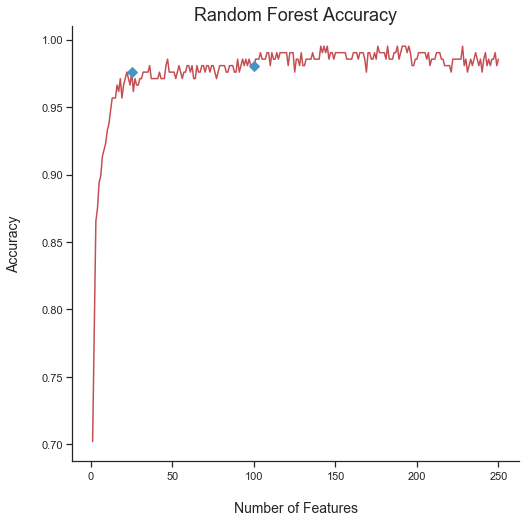

In [33]:
plt.figure(figsize = (8,8))
sns.set(font_scale=1)
sns.set_style("ticks")
plt.plot(numgenes, accuracy, '-rD', markevery=[150, 225], markerfacecolor="#4594c7", markeredgecolor="#4594c7", markersize=7)
sns.despine()
plt.title('Random Forest Accuracy', fontsize=18)
plt.xlabel('Number of Features', fontsize=14,labelpad=20)
plt.ylabel('Accuracy', fontsize=14,labelpad=20)
plt.savefig('Graphs/accuracy.pdf', format='pdf', transparent=True)
plt.show()

In [35]:
#Binary Labels
y_Mut = y
for label in labels:
    if label!='AD':
        y_Mut = y_Mut.replace(label, 'CONTROL')
print(y_Mut.head())
print(y_Mut.size)

0    CONTROL
1    CONTROL
2         AD
3    CONTROL
4    CONTROL
Name: 1, dtype: object
1040


## Compare with other models

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 556 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]:

0.9989694280078896


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.999896449704142


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9988264299802762
0.9546351084812623


C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.9996005917159764


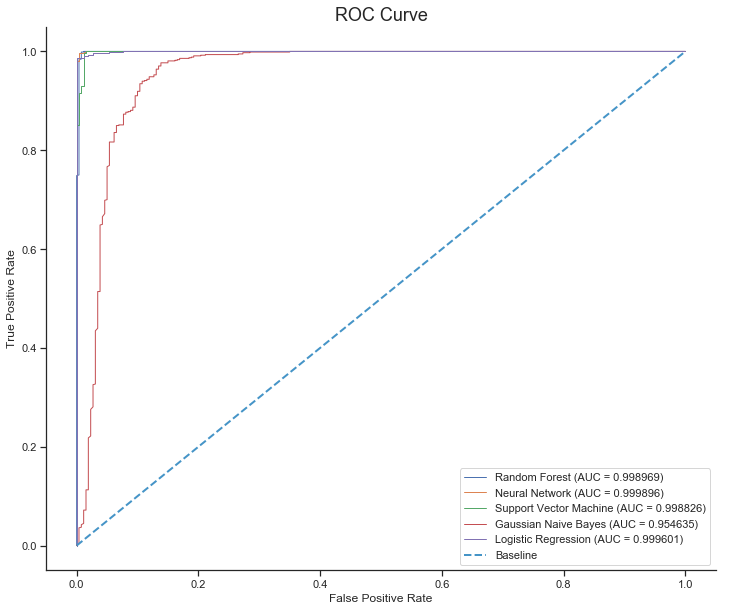

In [37]:
#Models
rf = RandomForestClassifier(n_estimators = 1000, random_state=r, oob_score=True, verbose=1, n_jobs = -1)
nn = MLPClassifier(random_state=r)
lr = LogisticRegression(random_state=r)
svm = SVC(random_state=r, probability=True)
gnb = GaussianNB()

plt.figure(figsize = (12, 10))

# Plot both curves
sns.set(font_scale=1)
sns.set_style("ticks")

models = [rf, nn, svm, gnb, lr]
models_name = ["Random Forest", "Neural Network", "Support Vector Machine", "Gaussian Naive Bayes", "Logistic Regression"]

for model, name in zip(models, models_name):
    probs = cross_val_predict(model, X_i, y, cv=5, verbose=1, method='predict_proba')
    probs = probs[:, 1]+probs[:, 2]+probs[:, 3]
    roc_value = roc_auc_score(y_Mut, probs)
    print(roc_value)
    model_fpr, model_tpr, _ = roc_curve(y_Mut, probs, pos_label='CONTROL')
    plt.plot(model_fpr, model_tpr, label = name + r' (AUC = %0.6f)' % (roc_value), lw=1)


plt.plot(base_fpr, base_tpr, label = 'Baseline', linestyle='--', lw=2, color = '#4594c7')
sns.despine()
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=18)
plt.savefig('Graphs/ROC_comparison_inner.pdf', format='pdf', transparent=True)
plt.show();


## Subset

In [38]:
#Top 25 Genes
n_genes=25
X_train_i = X_train_i.loc[:, feature_imp.index[:n_genes]]
X_test_i = X_test_i.loc[:, feature_imp.index[:n_genes]]
X_i = X_i.loc[:, feature_imp.index[:n_genes]]
indexes = feature_imp.index[:n_genes]

## Final Random Forest

In [39]:
#Inner Random Forest
rf_most_important = RandomForestClassifier(n_estimators = 1000, random_state=r, oob_score=True, verbose=1, n_jobs = -1)

rf_most_important.fit(X_train_i, y_train)
y_pred_train = rf_most_important.predict(X_train_i)
y_pred = rf_most_important.predict(X_test_i)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Results: 
              precision    recall  f1-score   support

          AD       0.96      0.94      0.95        52
          CN       0.31      0.39      0.34        49
        EMCI       0.53      0.46      0.50        56
        LMCI       0.43      0.39      0.41        51

    accuracy                           0.55       208
   macro avg       0.56      0.55      0.55       208
weighted avg       0.56      0.55      0.55       208

Train:  1.0
Test:  0.5480769230769231
OOB Score:  0.5745192307692307


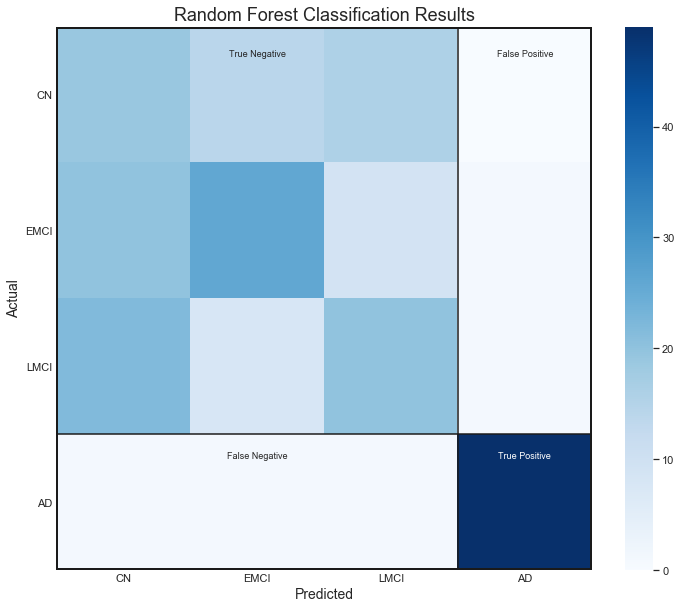

In [40]:
#Results
print("Results: ")
mat = confusion_matrix(y_test, y_pred, labels=labels)
print(classification_report(y_test,y_pred))
print('Train: ', accuracy_score(y_train, y_pred_train))
print('Test: ', accuracy_score(y_test, y_pred))
print('OOB Score: ', rf_most_important.oob_score_)

#Heatmap
heatmap(mat)

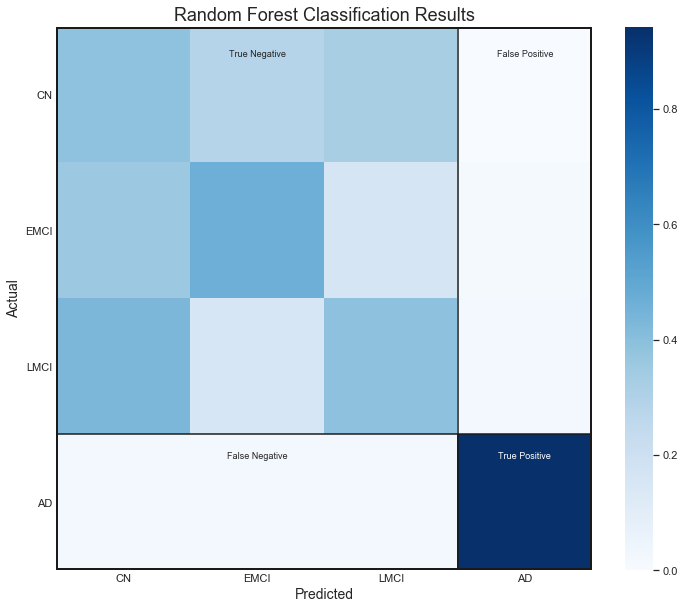

In [41]:
mat = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
#Heatmap
heatmap(mat)

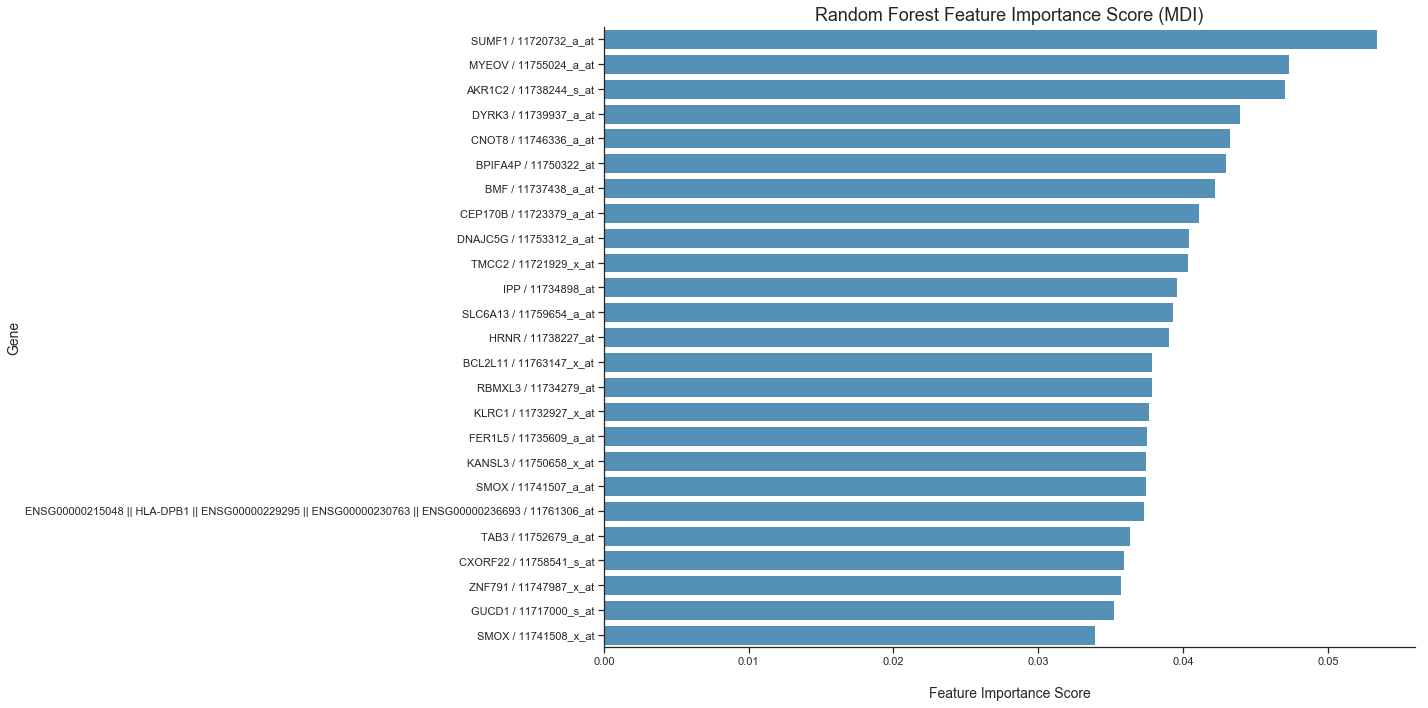

In [61]:
#Feature Importance
feature_imp = pd.Series(rf_most_important.feature_importances_,index=X_i.columns).sort_values(ascending=False)

#Barplot
plt.figure(figsize = (20,10))
sns.set(font_scale=1)
sns.set_style("ticks")
sns.barplot(x=feature_imp, y=feature_imp.index, color = '#4594c7')
sns.despine()
plt.title('Random Forest Feature Importance Score (MDI)', fontsize=18)
plt.xlabel('Feature Importance Score', fontsize=14,labelpad=20)
plt.ylabel('Gene', fontsize=14)
plt.tight_layout()
plt.savefig('Graphs/final_bar.pdf', format='pdf', transparent=True)

SUMF1 / 11720732_a_at                                                                                 0.053887
TMCC2 / 11721929_x_at                                                                                 0.101649
MYEOV / 11755024_a_at                                                                                 0.148329
BPIFA4P / 11750322_at                                                                                 0.192026
AKR1C2 / 11738244_s_at                                                                                0.235321
DYRK3 / 11739937_a_at                                                                                 0.277102
BCL2L11 / 11763147_x_at                                                                               0.318219
SLC6A13 / 11759654_a_at                                                                               0.359006
SMOX / 11741507_a_at                                                                                  0.399627
B

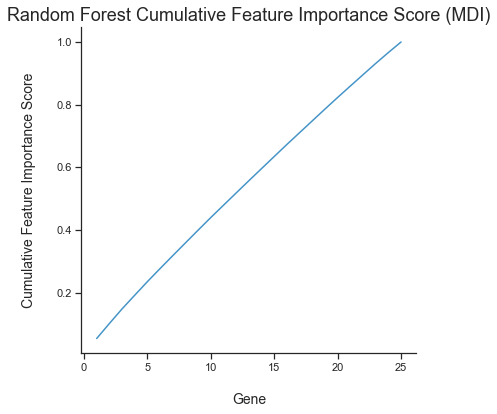

In [43]:
feature_imp_cum = feature_imp.cumsum()
print(feature_imp_cum)
plt.figure(figsize = (6,6))
sns.set(font_scale=1)
sns.set_style("ticks")
plt.plot(range(1, feature_imp_cum.size+1), feature_imp_cum, color = '#4594c7')
sns.despine()
plt.title('Random Forest Cumulative Feature Importance Score (MDI)', fontsize=18)
plt.xlabel('Gene', fontsize=14,labelpad=20)
plt.ylabel('Cumulative Feature Importance Score', fontsize=14,labelpad=20)
plt.savefig('Graphs/final_cumulative_feature_importance.pdf', format='pdf', transparent=True)
plt.show()

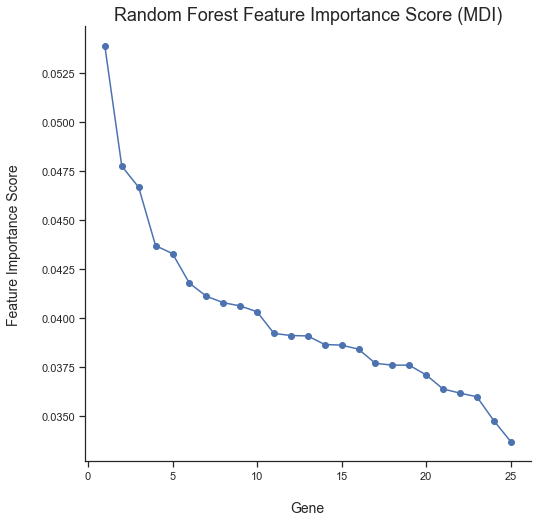

In [44]:
plt.figure(figsize = (8,8))
sns.set(font_scale=1)
sns.set_style("ticks")
plt.plot(range(1, feature_imp.size+1), feature_imp, "-o")
sns.despine()
plt.title('Random Forest Feature Importance Score (MDI)', fontsize=18)
plt.xlabel('Gene', fontsize=14,labelpad=20)
plt.ylabel('Feature Importance Score', fontsize=14,labelpad=20)
plt.savefig('Graphs/final_feature_importance.pdf', format='pdf', transparent=True)
plt.show()

## Save Top 25 Features

In [45]:
#Save genes
feature_imp.to_csv('Output/25_feature_importance_scores.txt', quoting=csv.QUOTE_MINIMAL)
feature_imp.index.to_series().to_csv('Output/25_ranked_genes.txt', quoting=csv.QUOTE_MINIMAL, index=False)

## 5 Fold Cross Validation

In [46]:
#5 Fold Cross Validation
y_pred = cross_val_predict(rf_most_important, X_i, y, cv=5, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 556 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Pa

In [47]:
#5 Fold Cross Validation Probabilities
y_pred_prob = cross_val_predict(rf_most_important, X_i, y, cv=5, verbose=3, method='predict_proba')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Par

In [48]:
#Binary Labels
y_Mut = y
for label in labels:
    if label!='AD':
        y_Mut = y_Mut.replace(label, 'CONTROL')
print(y_Mut.head())
print(y_Mut.size)

0    CONTROL
1    CONTROL
2         AD
3    CONTROL
4    CONTROL
Name: 1, dtype: object
1040


Results: 
              precision    recall  f1-score   support

          AD   0.940299  0.969231  0.954545       260
     CONTROL   0.989637  0.979487  0.984536       780

    accuracy                       0.976923      1040
   macro avg   0.964968  0.974359  0.969541      1040
weighted avg   0.977303  0.976923  0.977038      1040

Accuracy:  0.9769230769230769


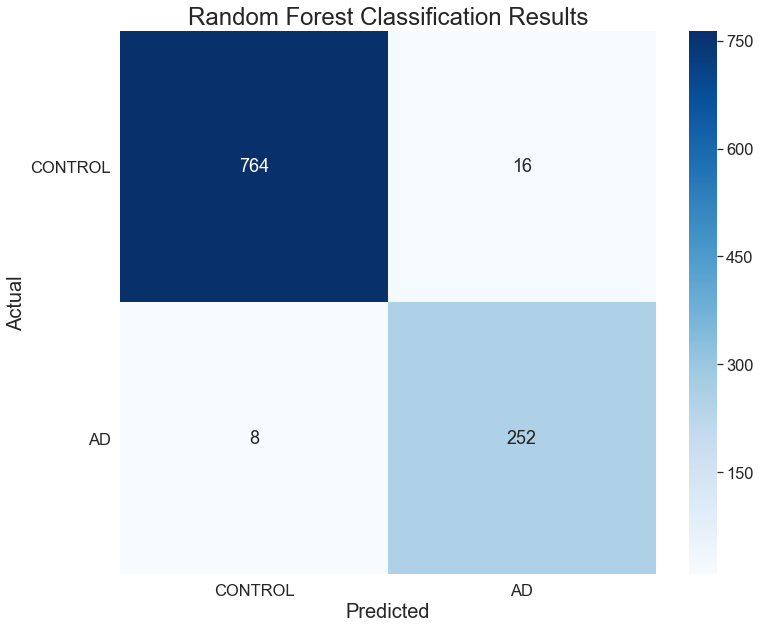

In [49]:
#Binary Labels
y_pred_Mut = y_pred
for label in labels:
    if label!='AD':
        y_pred_Mut = np.where(y_pred_Mut==label, 'CONTROL', y_pred_Mut)

#Results
print("Results: ")
mat = confusion_matrix(y_Mut, y_pred_Mut, labels=['CONTROL', 'AD'])
print(classification_report(y_Mut, y_pred_Mut, digits=6))
print('Accuracy: ', accuracy_score(y_Mut, y_pred_Mut))
l = [mat[1][0], mat[0][0], mat[1][1], mat[0][1]]

#Heatmap
sns.set(font_scale=1.5)
plt.figure(figsize = (12,10))
sns.heatmap(mat, annot=True, cmap="Blues", fmt='g', xticklabels=['CONTROL', 'AD'], yticklabels=['CONTROL', 'AD'], annot_kws={"fontsize":18})
plt.yticks(rotation=0) 
plt.title('Random Forest Classification Results', fontsize=24)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.savefig('Graphs/5F_confusion_matrix_final.pdf', format='pdf', transparent=True)
sns.set(font_scale=1)

In [50]:
# Make Binary
y_pred_prob = pd.DataFrame(y_pred_prob)
y_pred_prob = pd.DataFrame({'AD':y_pred_prob[0], 'CONTROL':y_pred_prob[1]+y_pred_prob[2]+y_pred_prob[3]})
y_pred_prob

,AD,CONTROL
0,0.073,0.927
1,0.229,0.771
2,0.883,0.117
3,0.016,0.984
4,0.105,0.895
...,...,...
1035,0.091,0.909
1036,0.052,0.948
1037,0.078,0.922
1038,0.028,0.972


0.997016765285996


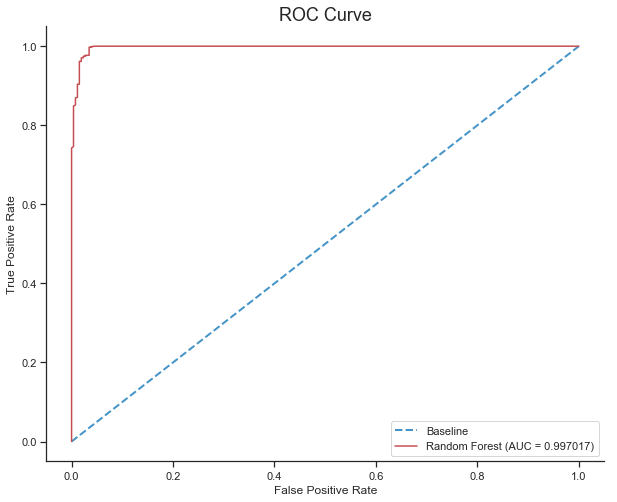

In [51]:
# ROC
probs = y_pred_prob['CONTROL'].to_list()

roc_value = roc_auc_score(y_Mut, probs)
print(roc_value)

# Calculate false positive rates and true positive rates
base_fpr, base_tpr, _ = roc_curve(y_Mut, [1 for _ in range(len(probs))], pos_label='CONTROL')
model_fpr, model_tpr, _ = roc_curve(y_Mut, probs, pos_label='CONTROL')

plt.figure(figsize = (10, 8))

# Plot both curves
sns.set(font_scale=1)
sns.set_style("ticks")
plt.plot(base_fpr, base_tpr, label = 'Baseline', linestyle='--', lw=2, color = '#4594c7')
plt.plot(model_fpr, model_tpr, 'r', label = r'Random Forest (AUC = %0.6f)' % (roc_value))
sns.despine()
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=18)
plt.savefig('Graphs/ROC_curve_final.pdf', format='pdf', transparent=True)
plt.show();


In [52]:
print(classification_report(y_Mut, y_pred_Mut, digits=6))

              precision    recall  f1-score   support

          AD   0.940299  0.969231  0.954545       260
     CONTROL   0.989637  0.979487  0.984536       780

    accuracy                       0.976923      1040
   macro avg   0.964968  0.974359  0.969541      1040
weighted avg   0.977303  0.976923  0.977038      1040



Results: 
              precision    recall  f1-score   support

          AD   0.940299  0.969231  0.954545       260
          CN   0.361111  0.350000  0.355469       260
        EMCI   0.505929  0.492308  0.499025       260
        LMCI   0.486891  0.500000  0.493359       260

    accuracy                       0.577885      1040
   macro avg   0.573557  0.577885  0.575600      1040
weighted avg   0.573557  0.577885  0.575600      1040

Accuracy:  0.5778846153846153


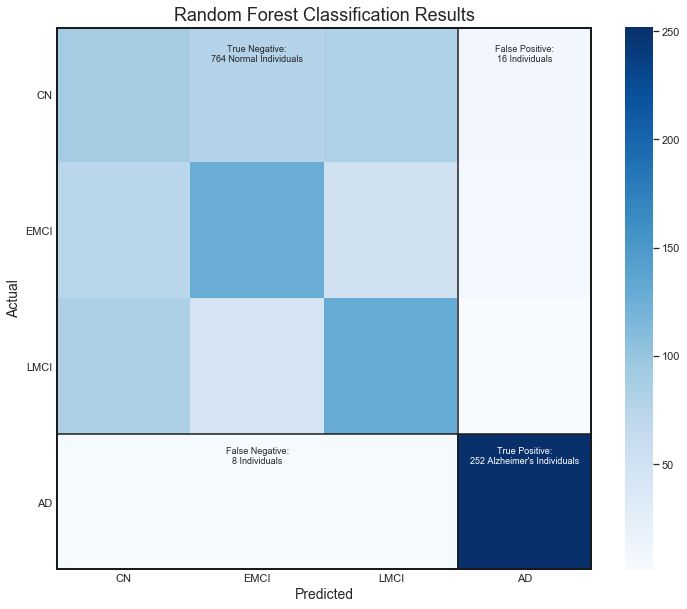

In [53]:
#Results
print("Results: ")
mat = confusion_matrix(y, y_pred, labels=labels)
print(classification_report(y, y_pred, digits=6))
print('Accuracy: ', accuracy_score(y, y_pred))
#Heatmap
heatmap(mat, lbl=l)

In [54]:
print(classification_report(y, y_pred, digits=6))

              precision    recall  f1-score   support

          AD   0.940299  0.969231  0.954545       260
          CN   0.361111  0.350000  0.355469       260
        EMCI   0.505929  0.492308  0.499025       260
        LMCI   0.486891  0.500000  0.493359       260

    accuracy                       0.577885      1040
   macro avg   0.573557  0.577885  0.575600      1040
weighted avg   0.573557  0.577885  0.575600      1040



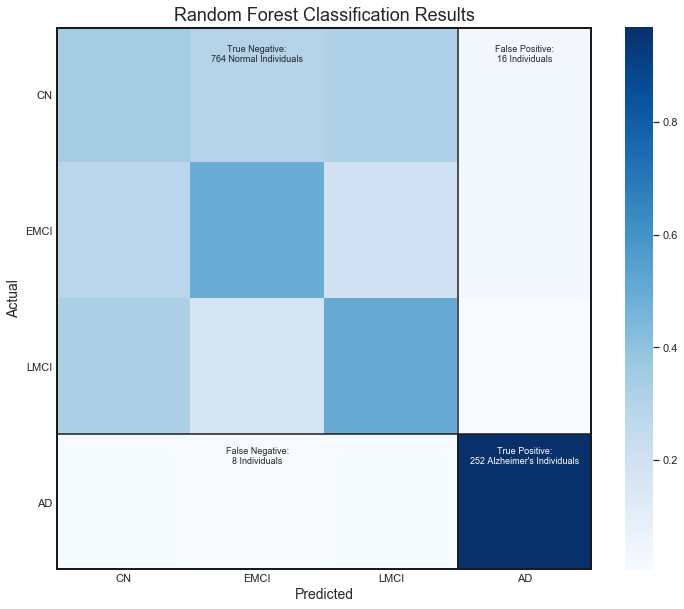

In [55]:
mat = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
#Heatmap
heatmap(mat, lbl=l)
plt.savefig('Graphs/5F_heatmap_final.pdf', format='pdf', transparent=True)

## Manual 5 Fold Cross Validation

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


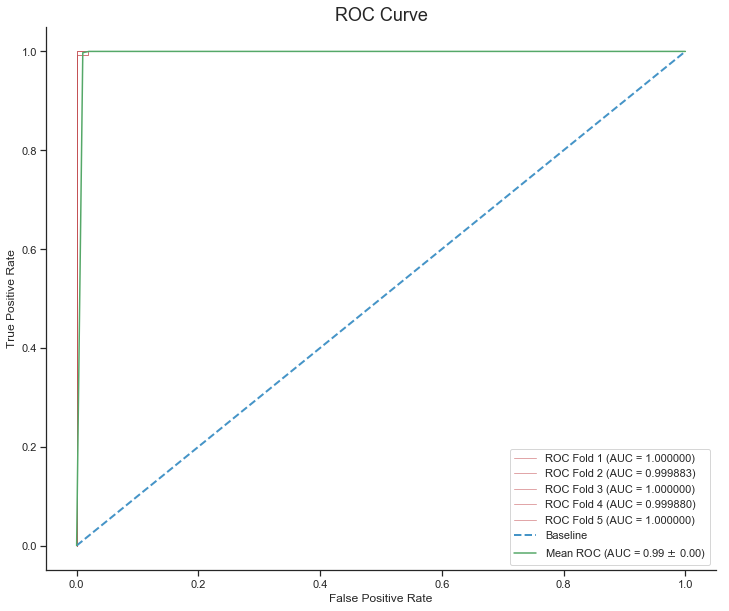

In [56]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = rf_most_important

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

sns.set(font_scale=1)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (12, 10))

for i, (train, test) in enumerate(cv.split(X_i, y)):
    classifier.fit(X_i.loc[train], y[train])
    
    y_pred = classifier.predict(X_i.loc[test])
    for label in labels:
        if label!='AD':
            y_pred = np.where(y_pred==label, 'CONTROL', y_pred)  
            
    probs = classifier.predict_proba(X_i.loc[test])
    probs = probs[:, 1]+probs[:, 2]+probs[:, 3]
        
    roc_value = roc_auc_score(y_pred, probs)
    model_fpr, model_tpr, _ = roc_curve(y_pred, probs, pos_label='CONTROL')
    ax.plot(model_fpr, model_tpr, 'r', label=r'ROC Fold %d (AUC = %0.6f)' % (i+1, roc_value), alpha=0.5, lw=1)
    
    interp_tpr = np.interp(mean_fpr, model_fpr, model_tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_value)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='#4594c7', label='Baseline')

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color = 'g', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=1.5, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=18)

#std_tpr = np.std(tprs, axis=0)
#tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
#tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                #label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
ax.legend(loc="lower right")
sns.despine()

plt.savefig('Graphs/5F_ROC_curves_final.pdf', format='pdf', transparent=True)
plt.show()

## Compare with other models

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 556 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 556 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]:

0.997016765285996


C:\Users\andre\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

0.9937869822485207


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9892652859960552
0.9522731755424063


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


0.947051282051282


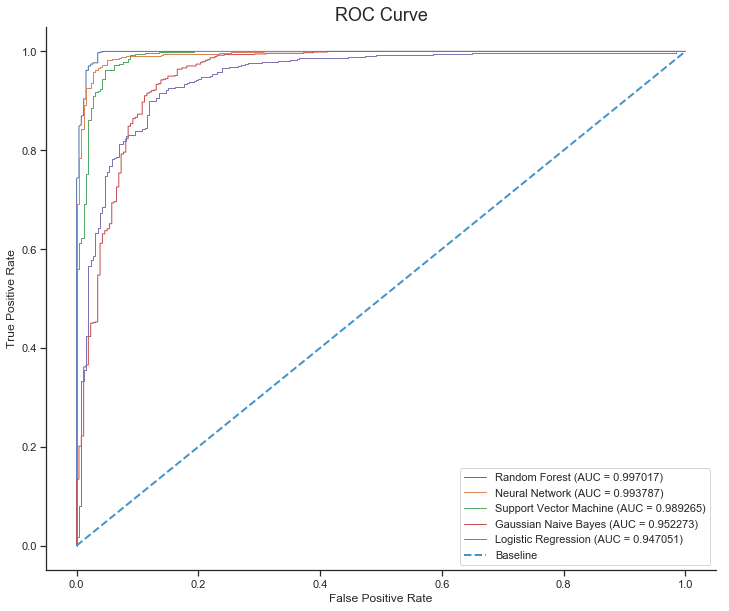

In [57]:
#Models
rf = RandomForestClassifier(n_estimators = 1000, random_state=r, oob_score=True, verbose=1, n_jobs = -1)
nn = MLPClassifier(random_state=r)
lr = LogisticRegression(random_state=r)
svm = SVC(random_state=r, probability=True)
gnb = GaussianNB()

plt.figure(figsize = (12, 10))

# Plot both curves
sns.set(font_scale=1)
sns.set_style("ticks")

models = [rf, nn, svm, gnb, lr]
models_name = ["Random Forest", "Neural Network", "Support Vector Machine", "Gaussian Naive Bayes", "Logistic Regression"]

for model, name in zip(models, models_name):
    probs = cross_val_predict(model, X_i, y, cv=5, verbose=1, method='predict_proba')
    probs = probs[:, 1]+probs[:, 2]+probs[:, 3]
    roc_value = roc_auc_score(y_Mut, probs)
    print(roc_value)
    model_fpr, model_tpr, _ = roc_curve(y_Mut, probs, pos_label='CONTROL')
    plt.plot(model_fpr, model_tpr, label = name + r' (AUC = %0.6f)' % (roc_value), lw=1)


plt.plot(base_fpr, base_tpr, label = 'Baseline', linestyle='--', lw=2, color = '#4594c7')
sns.despine()
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=18)
plt.savefig('Graphs/ROC_comparison.pdf', format='pdf', transparent=True)
plt.show();
